In [1]:
import numpy as np
from RegressionFunc import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2 

In [4]:
df = pd.read_csv('../data/gfs_days.csv', sep = ';', index_col = 'Date', parse_dates = ['Date'])

# Температурные инверсии
df['DT1'] = df['TMP_mb_1000'] - df['TMP_mb_925']
df['DT2'] = df['TMP_mb_925'] - df['TMP_mb_850']
df['DT3'] = df['TMP_mb_1000'] - df['TMP_mb_850']

### Температура  на разных слоях, высота планетарного пограничного слоя, инверсии

In [5]:
df = df[[feat for feat in df.columns if "TMP_" in feat] + ['HPBL', 'DT1', 'DT2', 'DT3']] 
df

,TMP_m_2,TMP_m_80,TMP_m_100,TMP_mb_700,TMP_mb_750,TMP_mb_800,TMP_mb_850,TMP_mb_900,TMP_mb_925,TMP_mb_950,...,TMP_msl_2743,TMP_msl_3658,TMP_pv_p2,TMP_sig_0995,TMP_surf,TMP_tropo,HPBL,DT1,DT2,DT3
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-15.036028,-14.065619,-14.010622,-20.649996,-18.626736,-17.012074,-15.319868,-13.626802,-12.756472,-12.964930,...,-19.784126,-22.812513,-62.409014,-14.221346,-16.305109,-62.673685,43.268045,-1.086754,2.563396,1.476642
2019-01-02,-15.554727,-14.968962,-14.905069,-23.507378,-20.651045,-18.688894,-17.069113,-15.133181,-14.224478,-13.897070,...,-22.252352,-27.242889,-56.770241,-15.086241,-16.463743,-59.259321,97.546916,-0.483261,2.844635,2.361374
2019-01-03,-17.415102,-16.447024,-16.394486,-25.180206,-22.337277,-20.026792,-18.559624,-17.449488,-16.754423,-16.326780,...,-24.025007,-27.632092,-55.220438,-16.639517,-18.737488,-59.174357,85.520970,0.401894,1.805201,2.207094
2019-01-04,-19.989693,-18.020252,-17.768793,-19.825367,-18.607857,-17.459810,-16.329878,-14.933958,-14.451819,-15.250547,...,-19.354433,-22.188843,-62.408976,-18.575432,-21.945013,-62.895603,40.738016,-3.801737,1.878059,-1.923678
2019-01-05,-18.821886,-18.110851,-18.075773,-21.143309,-18.679708,-16.926903,-15.861925,-15.289194,-15.490312,-16.855044,...,-20.236590,-25.053589,-60.781376,-18.221583,-20.136263,-61.614156,263.549033,-2.246016,0.371612,-1.874403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,-7.618063,-4.470061,-4.146880,-14.083689,-12.260530,-10.486384,-9.124845,-6.647333,-5.022295,-3.504878,...,-13.467420,-17.252581,-60.608404,-5.325735,-8.122816,-61.610197,281.907345,-1.346138,4.102550,2.756412
2023-03-24,-3.271002,-2.582552,-2.553904,-14.877546,-13.351339,-11.571100,-9.495936,-6.107657,-4.617419,-3.169116,...,-14.328211,-17.802200,-53.467092,-2.680350,-3.933524,-58.469564,437.416414,2.578205,4.878517,7.456722
2023-03-25,0.085931,0.274252,0.151678,-10.579813,-8.487696,-7.807974,-6.302184,-4.067301,-2.481543,-0.928030,...,-9.755892,-14.163015,-64.430212,0.515627,-1.394549,-64.706514,687.471212,3.989250,3.820641,7.809891


### Давление, влажность, направление и скорость ветра

In [6]:
sensor = 's'
fill = '_fill'

district = 'Mean'

# Данные pm за 4+ года
df['pm'] = pd.read_csv(f"../data/pm25_{sensor}{fill}.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'], usecols = ['Date', district])[:"2023-03-27"].values

features = ['Pressure', 'Wet', 'Wind_dir', 'Wind_speed']
for feat in features:
    df[feat] = pd.read_csv(f"../data/Features{fill}/{feat}_{sensor}.csv", sep = ';', index_col = ['Date'], parse_dates = ['Date'], usecols = ['Date', district])[:"2023-03-27"]
df

,TMP_m_2,TMP_m_80,TMP_m_100,TMP_mb_700,TMP_mb_750,TMP_mb_800,TMP_mb_850,TMP_mb_900,TMP_mb_925,TMP_mb_950,...,TMP_tropo,HPBL,DT1,DT2,DT3,pm,Pressure,Wet,Wind_dir,Wind_speed
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-15.036028,-14.065619,-14.010622,-20.649996,-18.626736,-17.012074,-15.319868,-13.626802,-12.756472,-12.964930,...,-62.673685,43.268045,-1.086754,2.563396,1.476642,220.8950,761.25,63.475,237.00,0.70
2019-01-02,-15.554727,-14.968962,-14.905069,-23.507378,-20.651045,-18.688894,-17.069113,-15.133181,-14.224478,-13.897070,...,-59.259321,97.546916,-0.483261,2.844635,2.361374,103.4725,761.50,64.950,270.00,1.70
2019-01-03,-17.415102,-16.447024,-16.394486,-25.180206,-22.337277,-20.026792,-18.559624,-17.449488,-16.754423,-16.326780,...,-59.174357,85.520970,0.401894,1.805201,2.207094,20.8300,762.75,63.900,273.00,2.80
2019-01-04,-19.989693,-18.020252,-17.768793,-19.825367,-18.607857,-17.459810,-16.329878,-14.933958,-14.451819,-15.250547,...,-62.895603,40.738016,-3.801737,1.878059,-1.923678,133.9000,761.50,62.750,243.00,1.30
2019-01-05,-18.821886,-18.110851,-18.075773,-21.143309,-18.679708,-16.926903,-15.861925,-15.289194,-15.490312,-16.855044,...,-61.614156,263.549033,-2.246016,0.371612,-1.874403,119.5750,757.50,62.125,268.00,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,-7.618063,-4.470061,-4.146880,-14.083689,-12.260530,-10.486384,-9.124845,-6.647333,-5.022295,-3.504878,...,-61.610197,281.907345,-1.346138,4.102550,2.756412,24.9400,753.00,52.175,276.54,1.45
2023-03-24,-3.271002,-2.582552,-2.553904,-14.877546,-13.351339,-11.571100,-9.495936,-6.107657,-4.617419,-3.169116,...,-58.469564,437.416414,2.578205,4.878517,7.456722,15.2200,748.25,57.875,247.66,2.46
2023-03-25,0.085931,0.274252,0.151678,-10.579813,-8.487696,-7.807974,-6.302184,-4.067301,-2.481543,-0.928030,...,-64.706514,687.471212,3.989250,3.820641,7.809891,6.2400,747.75,51.100,220.05,4.23


In [7]:
df.dropna(inplace = True)
df.shape

(1546, 30)

# Линейная регрессия

## Построение моделей

In [8]:
pd.options.mode.chained_assignment = None

### Без отбора признаков

In [9]:
fileName = 'XGBoost.xlsx'
#fileName = 'Ошибки регрессий на признаках gfs + геопортал.xlsx'

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.01s/it]


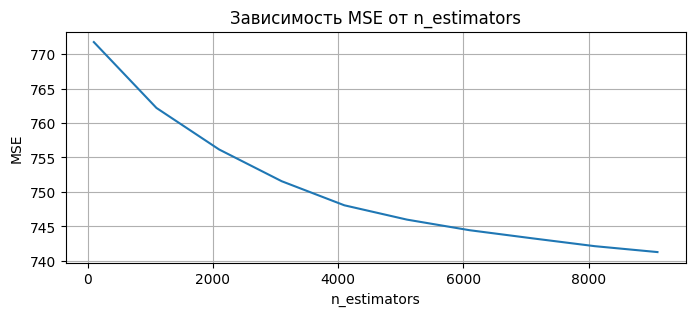

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.32s/it]


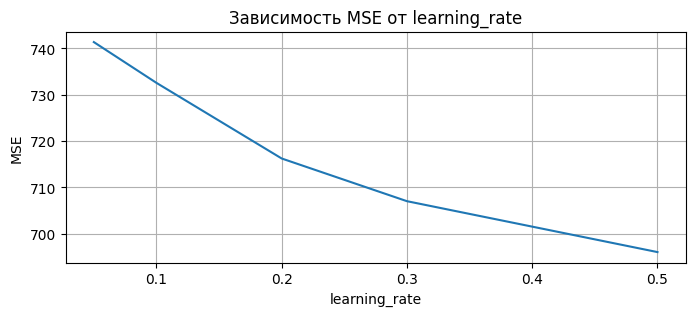

,Train,Valid,Test
"{'learning_rate': 0.05, 'n_estimators': 6100}",,,
MSE,698.29,696.00,361.21
MAE,19.61,20.66,15.19
MAPE,0.79,0.90,0.82
R2,0.68,0.51,0.75
R2_adj,0.64,0.21,-0.06


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


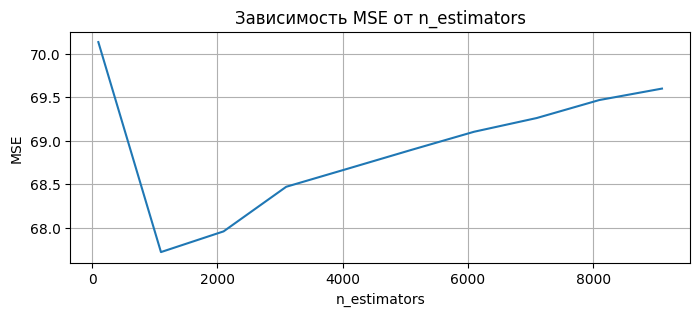

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


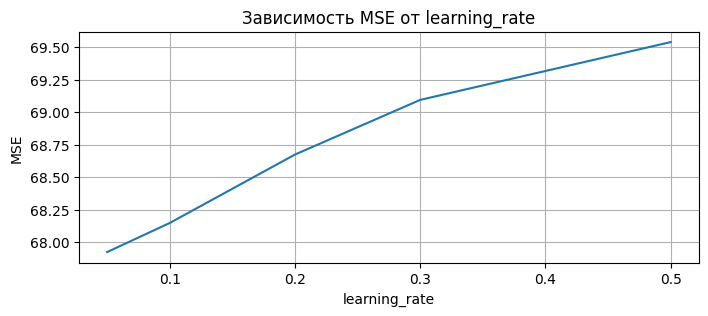

,Train,Valid,Test
"{'learning_rate': 0.5, 'n_estimators': 1100}",,,
MSE,52.74,69.54,53.34
MAE,5.47,6.15,5.75
MAPE,0.46,0.46,0.46
R2,0.57,0.43,0.45
R2_adj,0.50,-0.01,-3.57


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


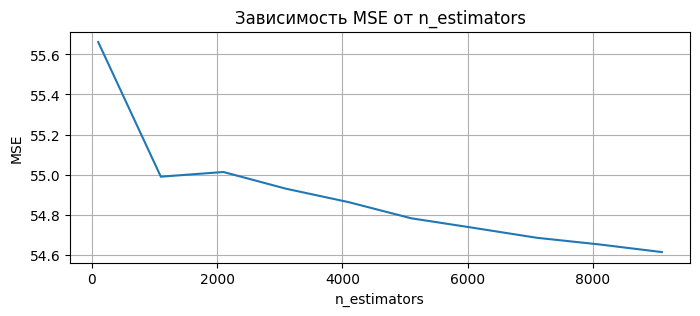

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.90s/it]


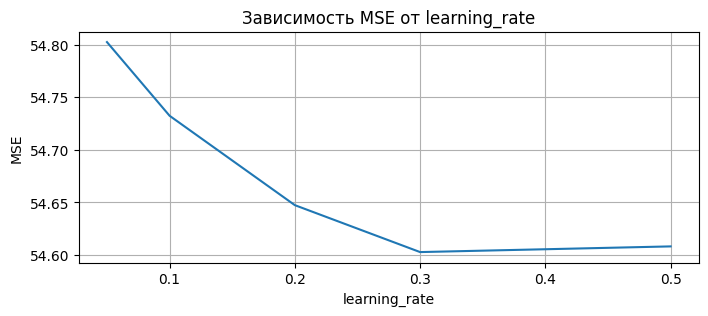

,Train,Valid,Test
"{'learning_rate': 0.5, 'n_estimators': 9100}",,,
MSE,13.67,54.61,26.74
MAE,2.86,4.20,4.01
MAPE,0.38,0.44,0.46
R2,0.50,0.09,0.45
R2_adj,0.43,-0.57,-2.73


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.94s/it]


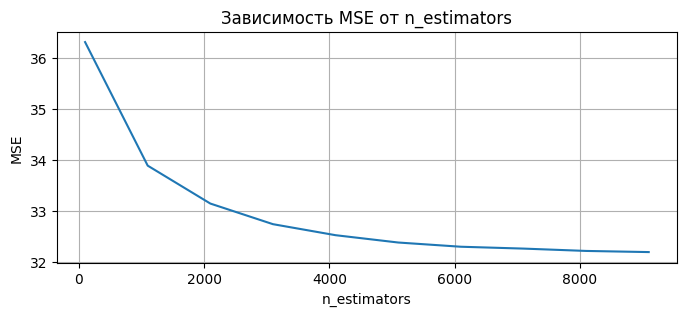

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.83s/it]


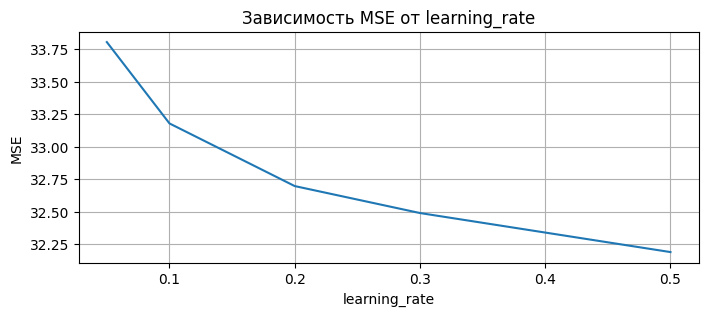

,Train,Valid,Test
"{'learning_rate': 0.5, 'n_estimators': 9100}",,,
MSE,15.70,32.19,16.80
MAE,3.02,3.66,3.22
MAPE,0.38,0.34,0.44
R2,0.71,0.60,0.62
R2_adj,0.66,0.16,11.56


In [11]:
for season in ['winters', 'springs', 'summers', 'autumns']:
    data = splitDataBySeason(df, season)
    
    resultDfs = BuildModels(data, modelType = 'xgbReg', param_dependences = ['n_estimators', 'learning_rate'])
    
    # Сохранение в файл
    #SaveResults('Results/', fileName, resultDfs, sheetName = 'Без отбора признаков')

### С отбором признаков

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.19it/s]


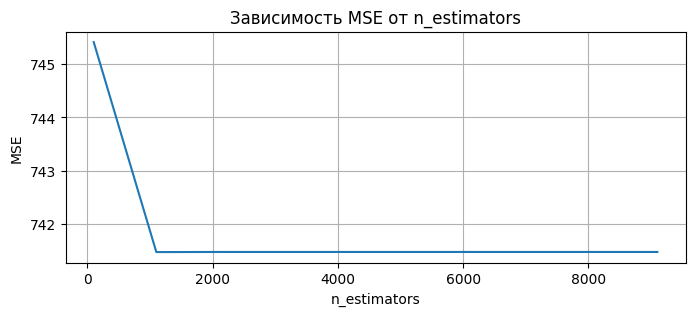

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.64s/it]


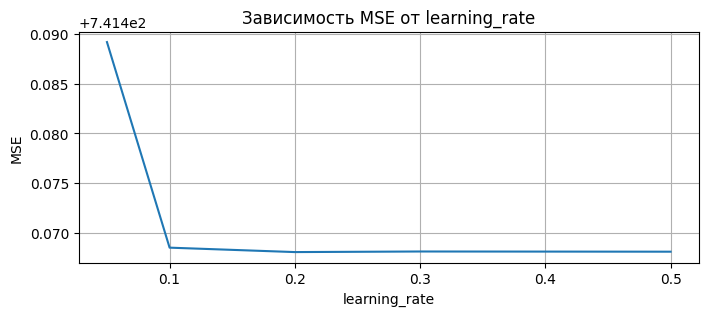

,Train,Valid,Test
"{'learning_rate': 0.5, 'n_estimators': 100}",,,
MSE,906.94,741.47,516.30
MAE,22.27,21.61,17.83
MAPE,0.89,1.00,1.01
R2,0.58,0.48,0.64
R2_adj,0.57,0.45,0.60


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.01s/it]


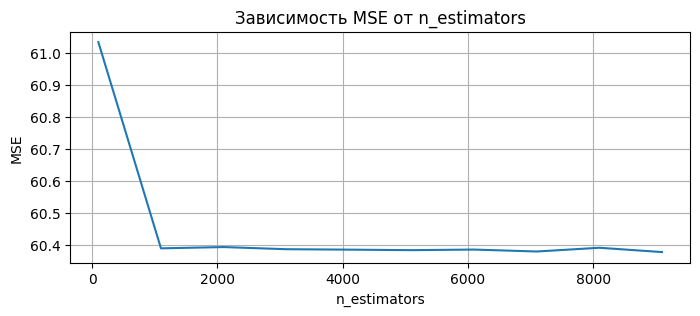

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.05s/it]


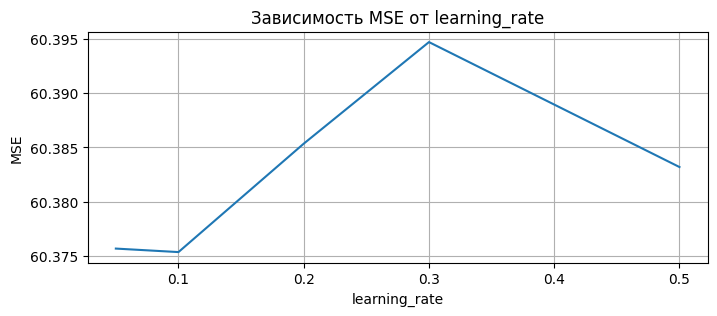

,Train,Valid,Test
"{'learning_rate': 0.2, 'n_estimators': 100}",,,
MSE,69.22,60.38,49.60
MAE,6.31,6.06,5.72
MAPE,0.54,0.50,0.49
R2,0.43,0.51,0.49
R2_adj,0.42,0.47,0.41


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.06it/s]


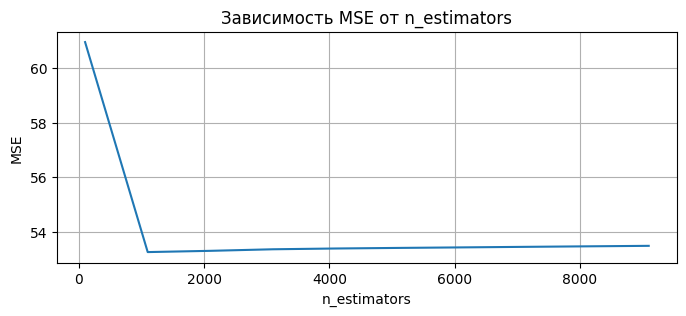

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.86s/it]


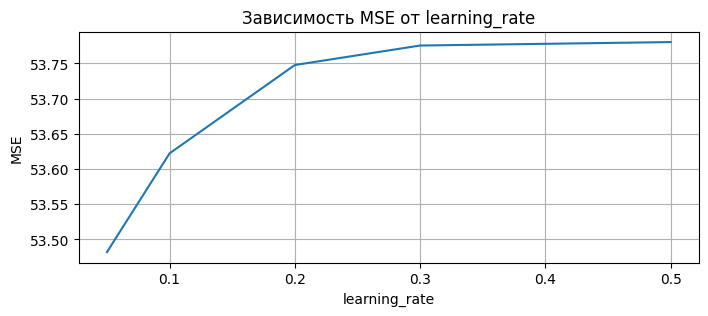

,Train,Valid,Test
"{'learning_rate': 0.05, 'n_estimators': 1100}",,,
MSE,16.54,53.78,32.83
MAE,3.09,4.12,4.62
MAPE,0.40,0.43,0.56
R2,0.40,0.11,0.33
R2_adj,0.38,0.04,0.21


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.08it/s]


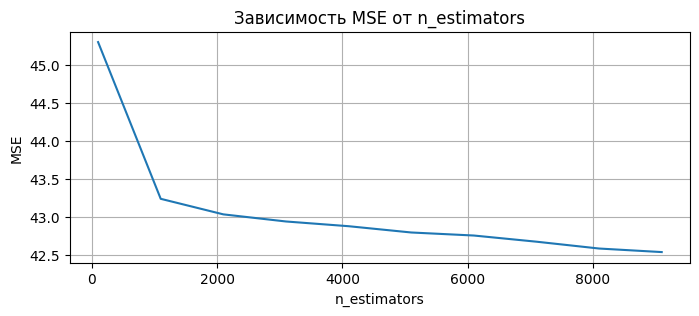

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.85s/it]


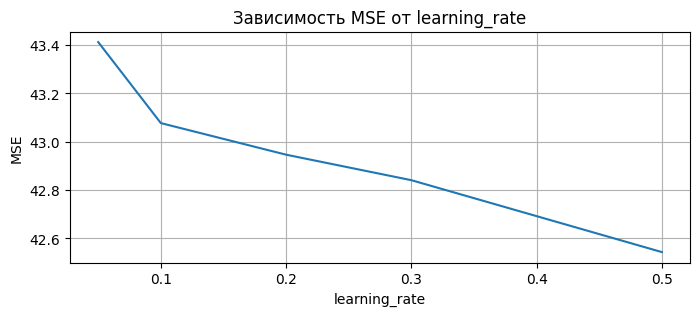

,Train,Valid,Test
"{'learning_rate': 0.5, 'n_estimators': 9100}",,,
MSE,27.07,42.54,27.12
MAE,3.81,4.42,4.01
MAPE,0.43,0.41,0.55
R2,0.50,0.48,0.39
R2_adj,0.49,0.42,0.26


In [12]:
for season in ['winters', 'springs', 'summers', 'autumns']:
    data = splitDataBySeason(df, season)
    
    features = []
    featureSelect(data.corr(method = 'spearman'), features)
    
    resultDfs = BuildModels(data[features + ['pm']], modelType = 'xgbReg', param_dependences = ['n_estimators', 'learning_rate'])
    
    # Сохранение в файл
    #SaveResults('Results/', fileName, resultDfs, sheetName = 'С отбором признаков', features = features, corr = data[features + ['pm']].corr(method = 'spearman')['pm'][:-1])